# PHÂN TÍCH DỮ LIỆU TRẦM CẢM Ở SINH VIÊN

## Student Depression Dataset Analysis

## Cài đặt

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Visualization settings
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 12
sns.set_palette("husl")

print(" Libraries imported successfully!")

 Libraries imported successfully!


## Giới thiệu

### Khái quát dữ liệu


**Tên tập dữ liệu:** Student Depression Dataset

**Mô tả ngắn gọn:** 
- Tập dữ liệu này thu thập thông tin về sức khỏe tinh thần của sinh viên, 
  bao gồm các yếu tố nhân khẩu học, học tập, lối sống và tâm lý.
- Mục tiêu chính: Phân tích và dự đoán tình trạng trầm cảm ở sinh viên.

**Quy mô dữ liệu:**
- Tổng số bản ghi: 27,901 sinh viên
- Tổng số thuộc tính: 18 cột
- Dữ liệu được thu thập từ các thành phố ở Ấn Độ

### Nguồn dữ liệu

#### Thông tin chính
- **Nền tảng:** Kaggle
- **Link:** https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset/data
- **Tác giả:** Adil Shamim
- **Usability Score:** 10.0/10

### License
- Bộ dữ liệu được phát hành theo Apache License 2.0.
- Được phép sử dụng bộ dữ liệu này cho mục đích giáo dục và nghiên cứu.
- Theo một số điều khoản của Apache License 2.0:
    - Không hạn chế việc sử dụng (được sửa đổi, phân phối lại, train model, publish kết quả).
    - Bắt buộc giữ lại thông báo bản quyền (copyright notice) và license Apache 2.0 nếu phân phối lại dữ liệu hoặc sản phẩm dẫn xuất.
    - Không được dùng tên tác giả/chủ sở hữu để quảng bá hay bảo trợ sản phẩm nếu chưa được cho phép.
    - ...

#### Bối cảnh thu thập
- Dữ liệu được thu thập từ sinh viên tại các thành phố ở Ấn Độ
- Bao gồm nhiều trường đại học và cấp bậc học khác nhau
- Dữ liệu tự báo cáo (self-reported) thông qua khảo sát

#### Đặc điểm nổi bật của dataset
1. **Quy mô lớn:** ~27,901 bản ghi - đủ lớn cho phân tích thống kê
2. **Đa chiều:** Bao gồm yếu tố nhân khẩu học, học tập, lối sống, tâm lý
3. **Thực tiễn:** Dữ liệu từ môi trường học tập thực tế
4. **Cân bằng hợp lý:** Tỷ lệ trầm cảm/không trầm cảm không quá chênh lệch

#### Lưu ý về dữ liệu
- Dữ liệu tự báo cáo có thể có bias
- Không có thông tin về phương pháp chẩn đoán trầm cảm cụ thể
- Cần thận trọng khi tổng quát hóa kết quả

### Lý do chọn tập dữ liệu

#### 1. Tính thời sự và cấp thiết
- **Khủng hoảng sức khỏe tâm thần toàn cầu:** WHO xác định trầm cảm là một trong những 
  nguyên nhân hàng đầu gây ra rối loạn sức khỏe tâm thần ở nhóm tuổi sinh sản
- **Ảnh hưởng đến sinh viên:** Áp lực học tập, định hướng nghề nghiệp, và chuyển đổi 
  cuộc sống đều góp phần vào nguy cơ trầm cảm

#### 2. Giá trị nghiên cứu
- **Nhiều chiều dữ liệu:** Cho phép phân tích đa yếu tố
- **Biến mục tiêu rõ ràng:** Binary classification - dễ dàng đánh giá mô hình
- **Quy mô đủ lớn:** >27,000 mẫu đảm bảo độ tin cậy thống kê

#### 3. Ứng dụng thực tiễn
- **Cảnh báo sớm:** Có thể xây dựng hệ thống phát hiện sớm sinh viên có nguy cơ
- **Định hướng can thiệp:** Xác định các yếu tố rủi ro để đề xuất biện pháp
- **Hỗ trợ chính sách:** Cung cấp insights cho các cơ sở giáo dục

#### 4. Tính khả thi kỹ thuật
- **Dữ liệu sạch:** Ít missing values
- **Cấu trúc rõ ràng:** Dễ preprocessing
- **Phù hợp ML:** Có thể áp dụng nhiều thuật toán khác nhau

#### Câu hỏi nghiên cứu chính
1. Yếu tố nào ảnh hưởng mạnh nhất đến trầm cảm ở sinh viên?
2. Có thể dự đoán trầm cảm dựa trên các đặc điểm có sẵn không?
3. Mối quan hệ giữa áp lực học tập và các yếu tố khác như thế nào?

In [31]:
# Load dữ liệu
df = pd.read_csv("../data/student_depression_dataset.csv")

# Hiển thị thông tin cơ bản
print("THÔNG TIN CƠ BẢN VỀ DỮ LIỆU")
print(f"\n Kích thước: {df.shape[0]:,} dòng x {df.shape[1]} cột")
print(f"\n Các cột trong dữ liệu:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i:2}. {col}")

THÔNG TIN CƠ BẢN VỀ DỮ LIỆU

 Kích thước: 27,901 dòng x 18 cột

 Các cột trong dữ liệu:
    1. id
    2. Gender
    3. Age
    4. City
    5. Profession
    6. Academic Pressure
    7. Work Pressure
    8. CGPA
    9. Study Satisfaction
   10. Job Satisfaction
   11. Sleep Duration
   12. Dietary Habits
   13. Degree
   14. Have you ever had suicidal thoughts ?
   15. Work/Study Hours
   16. Financial Stress
   17. Family History of Mental Illness
   18. Depression


In [32]:
column_descriptions = {
    "id": {
        "type": "Numerical (ID)",
        "description": "Mã định danh duy nhất cho mỗi sinh viên",
        "values": "Số nguyên dương",
    },
    "Gender": {
        "type": "Categorical",
        "description": "Giới tính của sinh viên",
        "values": "Male, Female",
    },
    "Age": {
        "type": "Numerical (Continuous)",
        "description": "Tuổi của sinh viên",
        "values": "Số nguyên (18-35+)",
    },
    "City": {
        "type": "Categorical",
        "description": "Thành phố sinh sống/học tập",
        "values": "Các thành phố ở Ấn Độ",
    },
    "Profession": {
        "type": "Categorical",
        "description": "Nghề nghiệp (trong dataset này chủ yếu là Student)",
        "values": "Student, Working Professional...",
    },
    "Academic Pressure": {
        "type": "Numerical (Ordinal)",
        "description": "Mức độ áp lực học tập (tự đánh giá)",
        "values": "1-5 (1: Thấp nhất, 5: Cao nhất)",
    },
    "Work Pressure": {
        "type": "Numerical (Ordinal)",
        "description": "Mức độ áp lực công việc",
        "values": "0-5 (0 nếu không đi làm)",
    },
    "CGPA": {
        "type": "Numerical (Continuous)",
        "description": "Điểm trung bình tích lũy (Cumulative Grade Point Average)",
        "values": "0.0-10.0",
    },
    "Study Satisfaction": {
        "type": "Numerical (Ordinal)",
        "description": "Mức độ hài lòng với việc học",
        "values": "1-5 (1: Rất không hài lòng, 5: Rất hài lòng)",
    },
    "Job Satisfaction": {
        "type": "Numerical (Ordinal)",
        "description": "Mức độ hài lòng với công việc",
        "values": "0-5 (0 nếu không có việc làm)",
    },
    "Sleep Duration": {
        "type": "Categorical (Ordinal)",
        "description": "Thời gian ngủ trung bình mỗi ngày",
        "values": "'Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours'",
    },
    "Dietary Habits": {
        "type": "Categorical (Ordinal)",
        "description": "Thói quen ăn uống",
        "values": "Healthy, Moderate, Unhealthy",
    },
    "Degree": {
        "type": "Categorical",
        "description": "Bằng cấp đang theo học",
        "values": "Class 12, BA, BSc, BE, B.Com, MBA, PhD, ...",
    },
    "Have you ever had suicidal thoughts ?": {
        "type": "Categorical (Binary)",
        "description": "Đã từng có suy nghĩ tự tử chưa",
        "values": "Yes, No",
    },
    "Work/Study Hours": {
        "type": "Numerical (Continuous)",
        "description": "Số giờ học/làm việc mỗi ngày",
        "values": "0-12+",
    },
    "Financial Stress": {
        "type": "Numerical (Ordinal)",
        "description": "Mức độ stress về tài chính",
        "values": "1-5 (1: Thấp nhất, 5: Cao nhất)",
    },
    "Family History of Mental Illness": {
        "type": "Categorical (Binary)",
        "description": "Gia đình có tiền sử bệnh tâm thần",
        "values": "Yes, No",
    },
    "Depression": {
        "type": "Categorical (Binary) - TARGET",
        "description": "BIẾN MỤC TIÊU: Tình trạng trầm cảm",
        "values": "0: Không trầm cảm, 1: Có trầm cảm",
    },
}

# Hiển thị bảng mô tả
print("\n" + "=" * 80)
print("MÔ TẢ CHI TIẾT CÁC THUỘC TÍNH")
print("=" * 80)

desc_data = []
for col, info in column_descriptions.items():
    desc_data.append(
        {
            "Tên cột": col,
            "Loại dữ liệu": info["type"],
            "Mô tả": info["description"],
            "Giá trị": info["values"],
        }
    )
desc_df = pd.DataFrame(desc_data)
display(desc_df.style.set_properties(**{"text-align": "left"}))
# Phân loại biến
print("PHÂN LOẠI BIẾN")

numerical_vars = [
    "Age",
    "CGPA",
    "Work/Study Hours",
    "Academic Pressure",
    "Work Pressure",
    "Study Satisfaction",
    "Job Satisfaction",
    "Financial Stress",
]
categorical_vars = [
    "Gender",
    "City",
    "Profession",
    "Sleep Duration",
    "Dietary Habits",
    "Degree",
    "Have you ever had suicidal thoughts ?",
    "Family History of Mental Illness",
]
target_var = "Depression"

print(f"\n Biến số (Numerical): {len(numerical_vars)} biến")
for v in numerical_vars:
    print(f"   - {v}")

print(f"\n Biến phân loại (Categorical): {len(categorical_vars)} biến")
for v in categorical_vars:
    print(f"   - {v}")

print(f"\n Biến mục tiêu (Target): {target_var}")


MÔ TẢ CHI TIẾT CÁC THUỘC TÍNH


,Tên cột,Loại dữ liệu,Mô tả,Giá trị
0,id,Numerical (ID),Mã định danh duy nhất cho mỗi sinh viên,Số nguyên dương
1,Gender,Categorical,Giới tính của sinh viên,"Male, Female"
2,Age,Numerical (Continuous),Tuổi của sinh viên,Số nguyên (18-35+)
3,City,Categorical,Thành phố sinh sống/học tập,Các thành phố ở Ấn Độ
4,Profession,Categorical,Nghề nghiệp (trong dataset này chủ yếu là Student),"Student, Working Professional..."
5,Academic Pressure,Numerical (Ordinal),Mức độ áp lực học tập (tự đánh giá),"1-5 (1: Thấp nhất, 5: Cao nhất)"
6,Work Pressure,Numerical (Ordinal),Mức độ áp lực công việc,0-5 (0 nếu không đi làm)
7,CGPA,Numerical (Continuous),Điểm trung bình tích lũy (Cumulative Grade Point Average),0.0-10.0
8,Study Satisfaction,Numerical (Ordinal),Mức độ hài lòng với việc học,"1-5 (1: Rất không hài lòng, 5: Rất hài lòng)"
9,Job Satisfaction,Numerical (Ordinal),Mức độ hài lòng với công việc,0-5 (0 nếu không có việc làm)


PHÂN LOẠI BIẾN

 Biến số (Numerical): 8 biến
   - Age
   - CGPA
   - Work/Study Hours
   - Academic Pressure
   - Work Pressure
   - Study Satisfaction
   - Job Satisfaction
   - Financial Stress

 Biến phân loại (Categorical): 8 biến
   - Gender
   - City
   - Profession
   - Sleep Duration
   - Dietary Habits
   - Degree
   - Have you ever had suicidal thoughts ?
   - Family History of Mental Illness

 Biến mục tiêu (Target): Depression


## Phân tích cơ bản và tổng quan

In [33]:

# 2.1 Xem mẫu dữ liệu
print("\n Mẫu dữ liệu đầu tiên:")
display(df.head(10))

print("\n Thông tin tổng quan:")
print(df.info())




 Mẫu dữ liệu đầu tiên:


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
5,33,Male,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,'Less than 5 hours',Healthy,PhD,No,4.0,1.0,No,0
6,52,Male,30.0,Thane,Student,3.0,0.0,9.54,4.0,0.0,'7-8 hours',Healthy,BSc,No,1.0,2.0,No,0
7,56,Female,30.0,Chennai,Student,2.0,0.0,8.04,4.0,0.0,'Less than 5 hours',Unhealthy,'Class 12',No,0.0,1.0,Yes,0
8,59,Male,28.0,Nagpur,Student,3.0,0.0,9.79,1.0,0.0,'7-8 hours',Moderate,B.Ed,Yes,12.0,3.0,No,1
9,62,Male,31.0,Nashik,Student,2.0,0.0,8.38,3.0,0.0,'Less than 5 hours',Moderate,LLB,Yes,2.0,5.0,No,1



 Thông tin tổng quan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 no

## Phân tích missing values

In [34]:


# Tính missing values
missing_data = pd.DataFrame(
    {
        "Missing Count": df.isnull().sum(),
        "Missing %": (df.isnull().sum() / len(df) * 100).round(2),
    }
)
missing_data = missing_data[missing_data["Missing Count"] > 0].sort_values(
    "Missing %", ascending=False
)

if len(missing_data) > 0:
    print("\n Các cột có giá trị thiếu:")
    display(missing_data)

    # Visualization
    fig, ax = plt.subplots(figsize=(10, 6))
    missing_data["Missing %"].plot(kind="barh", color="coral", ax=ax)
    ax.set_xlabel("Tỷ lệ Missing (%)")
    ax.set_title("Tỷ lệ Missing Values theo cột")
    plt.tight_layout()
    plt.show()
else:
    print("\n Không có missing values")

# Kiểm tra duplicate
duplicates = df.duplicated().sum()
print(f"\n Số bản ghi trùng lặp: {duplicates}")


 Không có missing values

 Số bản ghi trùng lặp: 0


## Tiền xử lý dữ liệu cơ bản

In [35]:

# Kiểm tra giá trị unique của các cột categorical
categorical_cols = [
    "Gender",
    "City",
    "Profession",
    "Sleep Duration",
    "Dietary Habits",
    "Degree",
    "Have you ever had suicidal thoughts ?",
    "Family History of Mental Illness",
]

print("\n Giá trị unique của các biến categorical:")
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(f"   Unique values: {df[col].nunique()}")
        print(f"   Values: {df[col].unique()[:10]}...")  # Hiển thị tối đa 10

# Kiểm tra giá trị của biến target
print(f"\n Phân phối biến mục tiêu (Depression):")
print(df["Depression"].value_counts())
print(f"\nTỷ lệ: {df['Depression'].value_counts(normalize=True).round(3)}")


 Giá trị unique của các biến categorical:

Gender:
   Unique values: 2
   Values: ['Male' 'Female']...

City:
   Unique values: 52
   Values: ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik']...

Profession:
   Unique values: 14
   Values: ['Student' "'Civil Engineer'" 'Architect' "'UX/UI Designer'"
 "'Digital Marketer'" "'Content Writer'" "'Educational Consultant'"
 'Teacher' 'Manager' 'Chef']...

Sleep Duration:
   Unique values: 5
   Values: ["'5-6 hours'" "'Less than 5 hours'" "'7-8 hours'" "'More than 8 hours'"
 'Others']...

Dietary Habits:
   Unique values: 4
   Values: ['Healthy' 'Moderate' 'Unhealthy' 'Others']...

Degree:
   Unique values: 28
   Values: ['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'PhD' "'Class 12'" 'B.Ed' 'LLB' 'BE']...

Have you ever had suicidal thoughts ?:
   Unique values: 2
   Values: ['Yes' 'No']...

Family History of Mental Illness:
   Unique values: 2
   Values: ['No' 'Yes']...

 Phân phối biến mục tiêu

In [ ]:
print("\n" + "=" * 60)
print("DATA PREPROCESSING")
print("=" * 60)

# Tạo copy để xử lý
df_clean = df.copy()

# 1. Xử lý cột Sleep Duration - loại bỏ dấu nháy đơn
if "Sleep Duration" in df_clean.columns:
    df_clean["Sleep Duration"] = df_clean["Sleep Duration"].str.replace("'", "")

# 2. Tạo cột Sleep Duration dạng số (ordinal encoding)
sleep_mapping = {
    "Less than 5 hours": 1,
    "5-6 hours": 2,
    "7-8 hours": 3,
    "More than 8 hours": 4,
}
df_clean["Sleep_Hours_Encoded"] = df_clean["Sleep Duration"].map(sleep_mapping)

# 3. Tạo cột Dietary Habits dạng số
diet_mapping = {"Unhealthy": 1, "Moderate": 2, "Healthy": 3}
df_clean["Diet_Encoded"] = df_clean["Dietary Habits"].map(diet_mapping)

# 4. Encode binary columns
df_clean["Suicidal_Thoughts"] = df_clean["Have you ever had suicidal thoughts ?"].map(
    {"Yes": 1, "No": 0}
)
df_clean["Family_History"] = df_clean["Family History of Mental Illness"].map(
    {"Yes": 1, "No": 0}
)
df_clean["Gender_Encoded"] = df_clean["Gender"].map({"Male": 0, "Female": 1})

# 5. Kiểm tra và xử lý outliers trong CGPA
print(f"\n CGPA Statistics:")
print(f"   Min: {df_clean['CGPA'].min()}")
print(f"   Max: {df_clean['CGPA'].max()}")
print(f"   Mean: {df_clean['CGPA'].mean():.2f}")

# 6. Xóa cột id (không cần thiết cho phân tích)
if "id" in df_clean.columns:
    df_clean = df_clean.drop("id", axis=1)
    print(" Đã xóa cột 'id'")

print("\n Preprocessing hoàn tất!")
print(f"   Shape sau preprocessing: {df_clean.shape}")

# Hiển thị các cột mới
print("\n Các cột mới được tạo:")
new_cols = [
    "Sleep_Hours_Encoded",
    "Diet_Encoded",
    "Suicidal_Thoughts",
    "Family_History",
    "Gender_Encoded",
]
for col in new_cols:
    print(f"   - {col}")

# 7. Final cleanup - ensure all numeric columns are properly converted
print("\n Final numeric conversion:")
numeric_cols_final = [
    "Age",
    "Academic Pressure",
    "Work Pressure",
    "CGPA",
    "Study Satisfaction",
    "Job Satisfaction",
    "Work/Study Hours",
    "Financial Stress",
    "Depression",
]
for col in numeric_cols_final:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")
        # Fill any remaining NaN with median (for numeric columns except Depression)
        if col != "Depression" and df_clean[col].isnull().any():
            median_val = df_clean[col].median()
            df_clean[col].fillna(median_val, inplace=True)
            print(f"   Filled NaN in {col} with median: {median_val:.2f}")

print(
    f"\n All numeric columns cleaned. Remaining NaN: {df_clean[numeric_cols_final].isnull().sum().sum()}"
)


DATA PREPROCESSING
 Đã clean cột Sleep Duration

 CGPA Statistics:
   Min: 0.0
   Max: 10.0
   Mean: 7.66
 Đã xóa cột 'id'

 Preprocessing hoàn tất!
   Shape sau preprocessing: (27901, 22)

 Các cột mới được tạo:
   - Sleep_Hours_Encoded
   - Diet_Encoded
   - Suicidal_Thoughts
   - Family_History
   - Gender_Encoded

 Final numeric conversion:
   Filled NaN in Financial Stress with median: 3.00

 All numeric columns cleaned. Remaining NaN: 0


## Phân tích

### Phân tích phân phối dữ liệu


PHÂN TÍCH PHÂN PHỐI DỮ LIỆU


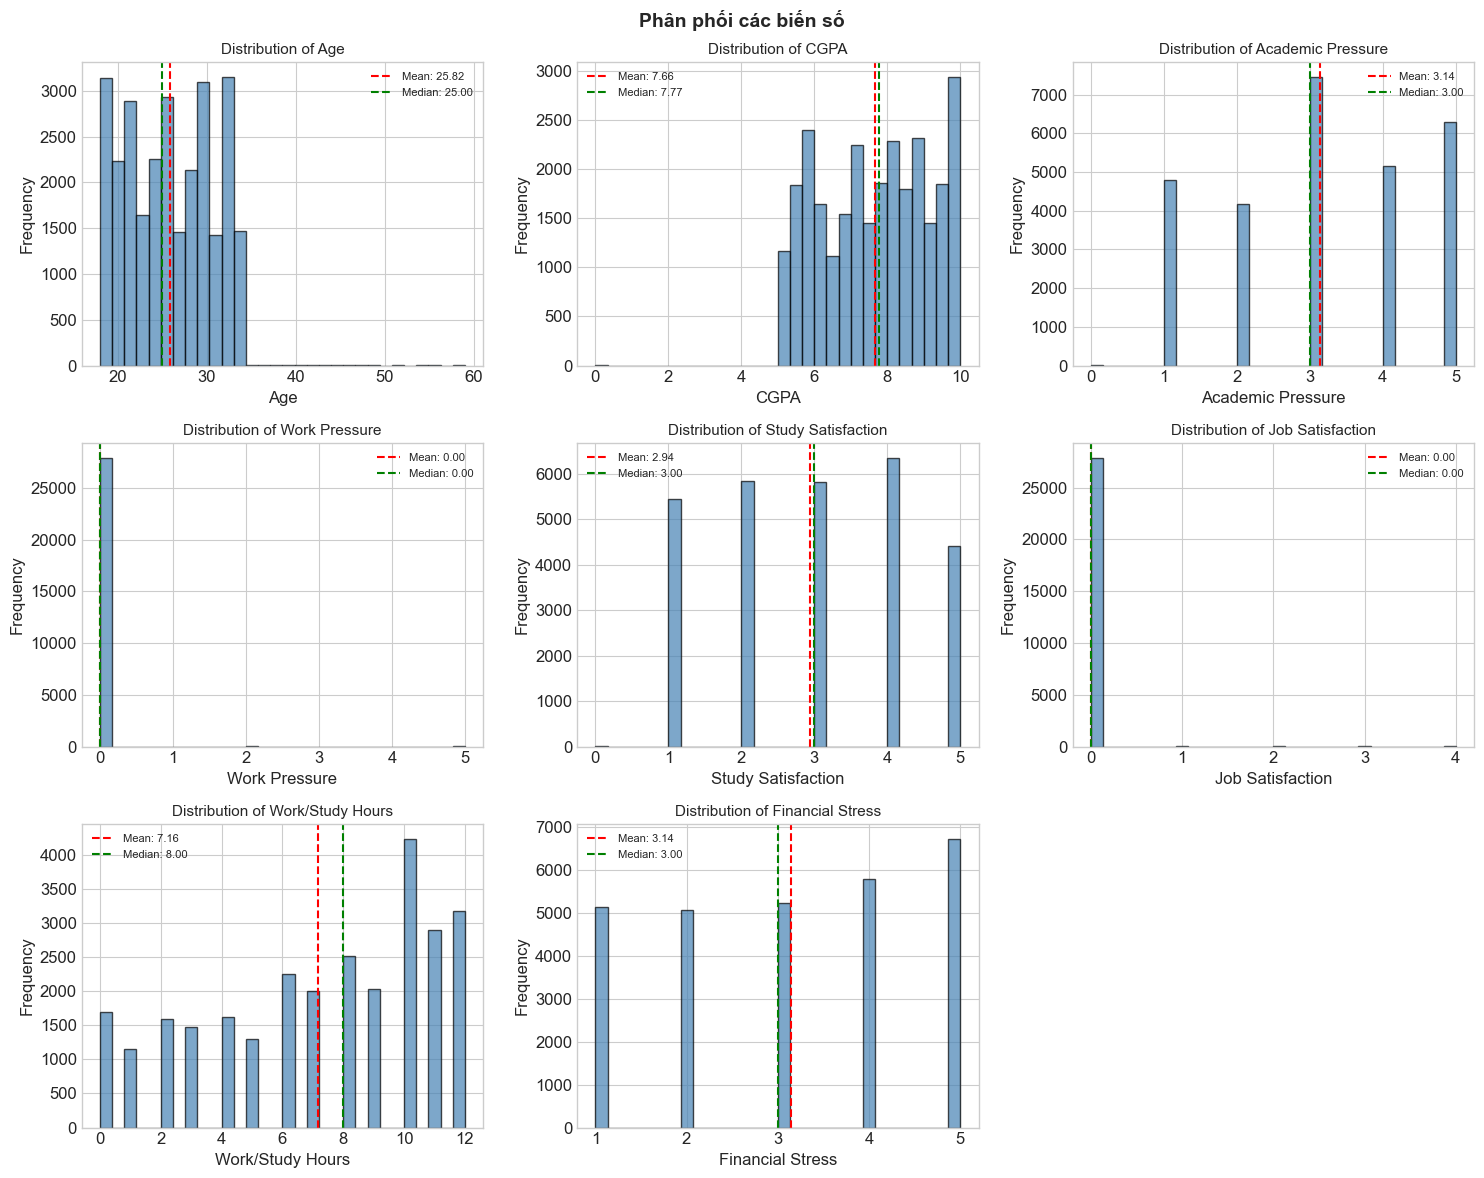


 Phân phối các biến categorical:


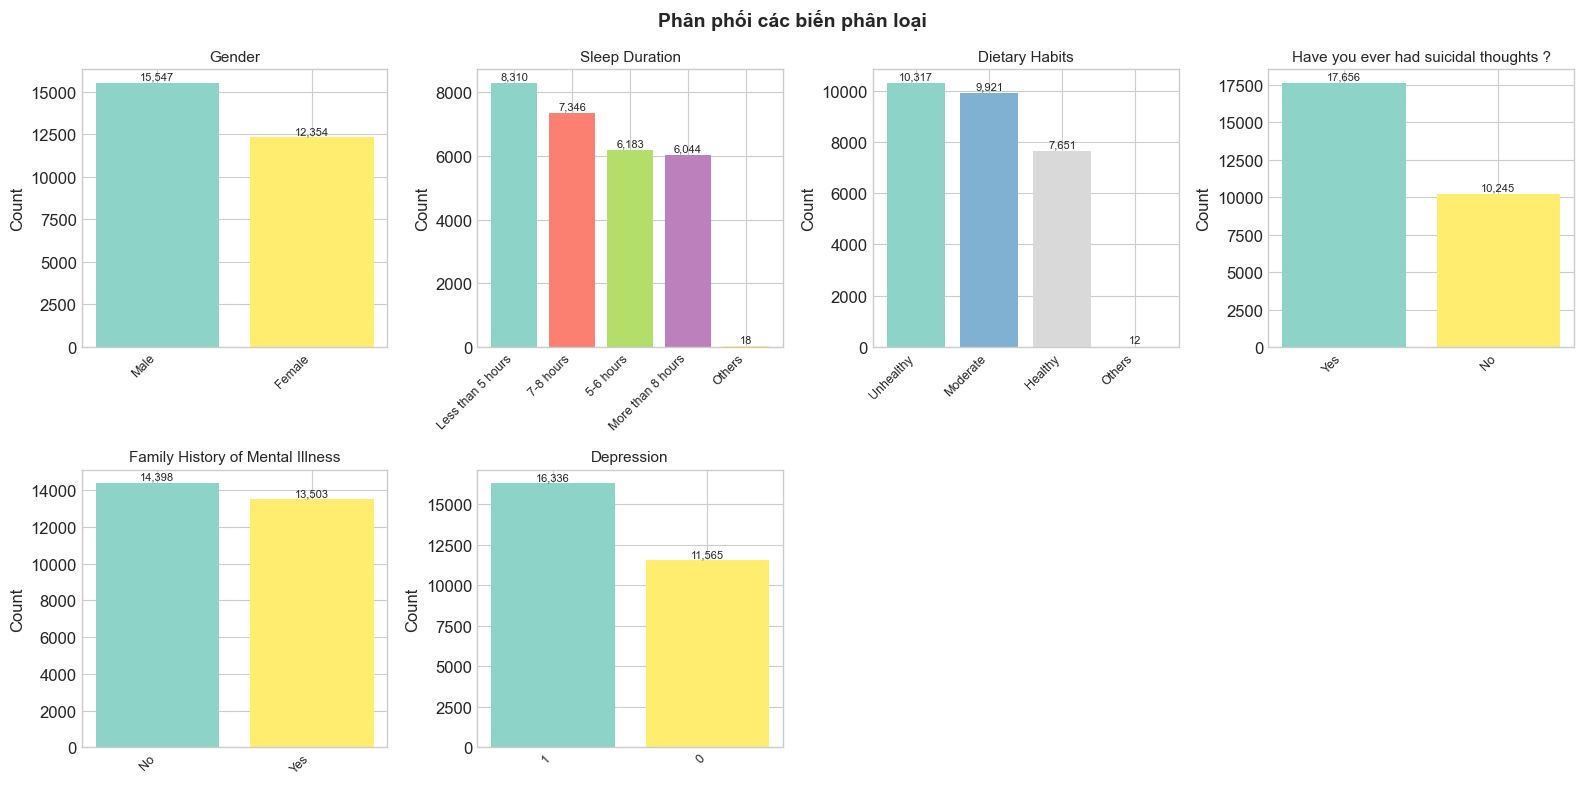

In [37]:
print("\n" + "=" * 60)
print("PHÂN TÍCH PHÂN PHỐI DỮ LIỆU")
print("=" * 60)

# Numerical variables
# Numerical variables - ensure they are numeric after preprocessing
numerical_cols = [
    "Age",
    "CGPA",
    "Academic Pressure",
    "Work Pressure",
    "Study Satisfaction",
    "Job Satisfaction",
    "Work/Study Hours",
    "Financial Stress",
]

# Ensure all are numeric
for col in numerical_cols:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    if col in df_clean.columns:
        ax = axes[idx]

        # Histogram với KDE
        df_clean[col].hist(
            bins=30, ax=ax, alpha=0.7, color="steelblue", edgecolor="black"
        )
        ax.set_title(f"Distribution of {col}", fontsize=11)
        ax.set_xlabel(col)
        ax.set_ylabel("Frequency")

        # Thêm thống kê
        mean_val = df_clean[col].mean()
        median_val = df_clean[col].median()
        ax.axvline(mean_val, color="red", linestyle="--", label=f"Mean: {mean_val:.2f}")
        ax.axvline(
            median_val, color="green", linestyle="--", label=f"Median: {median_val:.2f}"
        )
        ax.legend(fontsize=8)

# Ẩn subplot thừa
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis("off")

plt.suptitle("Phân phối các biến số", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

# Categorical variables
print("\n Phân phối các biến categorical:")

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

categorical_for_plot = [
    "Gender",
    "Sleep Duration",
    "Dietary Habits",
    "Have you ever had suicidal thoughts ?",
    "Family History of Mental Illness",
    "Depression",
]

for idx, col in enumerate(categorical_for_plot):
    if col in df_clean.columns:
        ax = axes[idx]
        value_counts = df_clean[col].value_counts()

        bars = ax.bar(
            range(len(value_counts)),
            value_counts.values,
            color=plt.cm.Set3(np.linspace(0, 1, len(value_counts))),
        )
        ax.set_xticks(range(len(value_counts)))
        ax.set_xticklabels(value_counts.index, rotation=45, ha="right", fontsize=9)
        ax.set_title(col, fontsize=11)
        ax.set_ylabel("Count")

        # Thêm số liệu trên cột
        for bar, val in zip(bars, value_counts.values):
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height() + 50,
                f"{val:,}",
                ha="center",
                va="bottom",
                fontsize=8,
            )

# Ẩn subplot thừa
for idx in range(len(categorical_for_plot), len(axes)):
    axes[idx].axis("off")

plt.suptitle("Phân phối các biến phân loại", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

### Phân tích tương quan


PHÂN TÍCH TƯƠNG QUAN


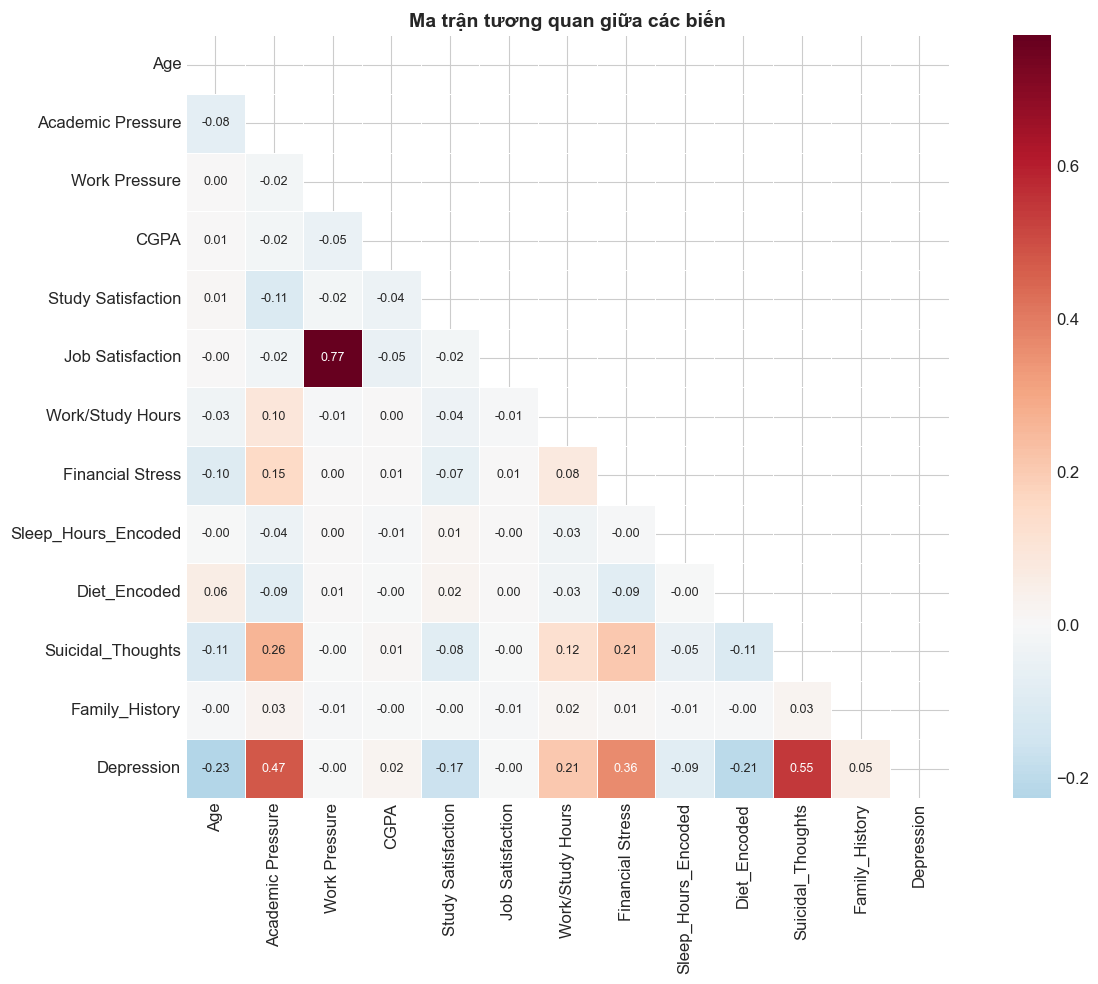


 Tương quan với biến Depression (xếp theo |r|):


,Variable,Correlation,|Correlation|
0,Suicidal_Thoughts,0.546277,0.546277
1,Academic Pressure,0.474835,0.474835
2,Financial Stress,0.363574,0.363574
3,Age,-0.226422,0.226422
4,Work/Study Hours,0.208563,0.208563
5,Diet_Encoded,-0.206689,0.206689
6,Study Satisfaction,-0.167971,0.167971
7,Sleep_Hours_Encoded,-0.087085,0.087085
8,Family_History,0.053430,0.053430
9,CGPA,0.022210,0.022210


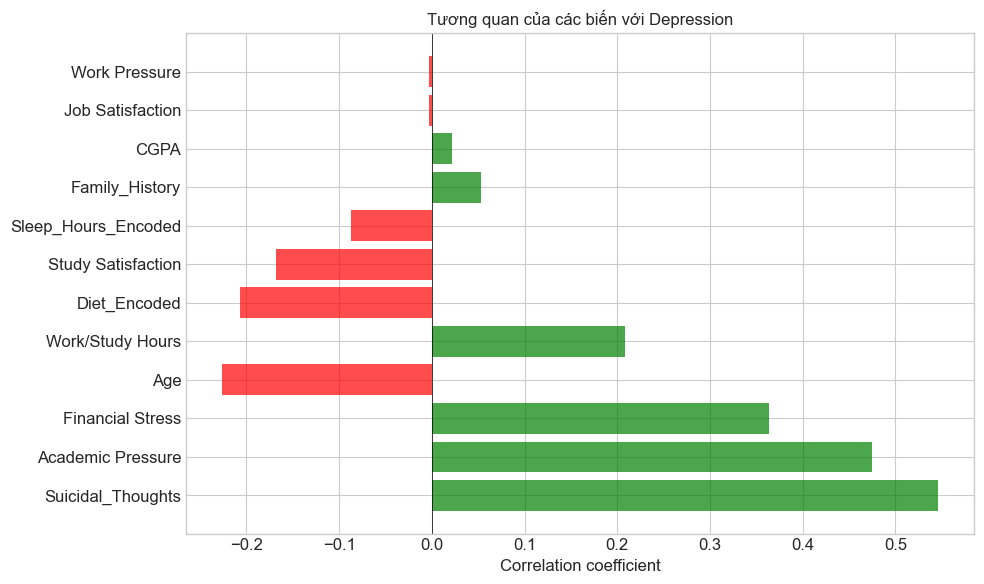

In [38]:
print("\n" + "=" * 60)
print("PHÂN TÍCH TƯƠNG QUAN")
print("=" * 60)

# Chọn các biến số cho correlation matrix
corr_cols = [
    "Age",
    "Academic Pressure",
    "Work Pressure",
    "CGPA",
    "Study Satisfaction",
    "Job Satisfaction",
    "Work/Study Hours",
    "Financial Stress",
    "Sleep_Hours_Encoded",
    "Diet_Encoded",
    "Suicidal_Thoughts",
    "Family_History",
    "Depression",
]

corr_matrix = df_clean[corr_cols].corr()

# Heatmap
fig, ax = plt.subplots(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    cmap="RdBu_r",
    center=0,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    ax=ax,
    annot_kws={"size": 9},
)
ax.set_title("Ma trận tương quan giữa các biến", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

# Correlation với biến target
print("\n Tương quan với biến Depression (xếp theo |r|):")
target_corr = (
    corr_matrix["Depression"].drop("Depression").abs().sort_values(ascending=False)
)
target_corr_df = pd.DataFrame(
    {
        "Variable": target_corr.index,
        "Correlation": corr_matrix["Depression"]
        .drop("Depression")[target_corr.index]
        .values,
        "|Correlation|": target_corr.values,
    }
)
display(target_corr_df)

# Bar chart
fig, ax = plt.subplots(figsize=(10, 6))
colors = ["green" if x > 0 else "red" for x in target_corr_df["Correlation"]]
ax.barh(
    target_corr_df["Variable"], target_corr_df["Correlation"], color=colors, alpha=0.7
)
ax.axvline(0, color="black", linewidth=0.5)
ax.set_xlabel("Correlation coefficient")
ax.set_title("Tương quan của các biến với Depression", fontsize=12)
plt.tight_layout()
plt.show()

### Kết luận

#### 1. Tóm tắt về dữ liệu

**Đặc điểm chung:**
- Dataset gồm **27,901** bản ghi và **18** thuộc tính, đủ lớn để đảm bảo độ tin cậy thống kê.
- Dữ liệu **không có missing values** và **không có bản ghi trùng lặp** → chất lượng dữ liệu tốt.
- Biến mục tiêu **Depression** có phân phối:
  - **Có trầm cảm (1)**: 16,336 sinh viên (58.5%)
  - **Không trầm cảm (0)**: 11,565 sinh viên (41.5%)
  - → Tương đối cân bằng, hơi lệch về nhóm trầm cảm (tỷ lệ 1.41:1)

**Chất lượng dữ liệu:**
-  Không có giá trị thiếu
-  Không có bản ghi trùng lặp
-  Các biến số đều có phân phối hợp lý, không có outliers bất thường
-  Biến phân loại có giá trị rõ ràng, dễ xử lý

---

#### 2. Phát hiện chính về các yếu tố liên quan đến trầm cảm

**A. Yếu tố tâm lý và sức khỏe tinh thần (quan trọng nhất):**

| Biến | Tương quan | Ý nghĩa |
|------|-----------|---------|
| **Suicidal Thoughts** | $r = 0.55$ | Tương quan dương **MẠNH NHẤT** - sinh viên có suy nghĩ tự tử có khả năng trầm cảm rất cao |

**B. Yếu tố áp lực và stress:**

| Biến | Tương quan | Ý nghĩa |
|------|-----------|---------|
| **Academic Pressure** | $r = 0.47$ | Áp lực học tập cao liên quan **MẠNH** đến trầm cảm |
| **Financial Stress** | $r = 0.36$ | Stress tài chính có mức độ ảnh hưởng **VỪA PHẢI** nhưng đáng kể |

**C. Yếu tố bảo vệ (tương quan âm - giảm nguy cơ trầm cảm):**

| Biến | Tương quan | Ý nghĩa |
|------|-----------|---------|
| **Age** | $r = -0.23$ | Sinh viên lớn tuổi hơn có xu hướng ít trầm cảm hơn |
| **Diet (Healthy)** | $r = -0.21$ | Chế độ ăn uống lành mạnh giúp giảm nguy cơ trầm cảm |
| **Study Satisfaction** | $r = -0.17$ | Hài lòng với việc học giúp bảo vệ sức khỏe tinh thần |

**D. Yếu tố có tương quan yếu hoặc không đáng kể:**

- **CGPA** ($r \approx 0$): Điểm số không có mối liên hệ tuyến tính rõ ràng với trầm cảm
- **Work Pressure** ($r \approx 0$): Áp lực công việc ít ảnh hưởng (có thể do nhiều sinh viên chưa làm việc)
- **Job Satisfaction** ($r \approx 0$): Tương tự, ít liên quan trong nhóm sinh viên
- **Family History** ($r \approx 0$): Bất ngờ, tiền sử gia đình không có tương quan mạnh trong dữ liệu này

---

